# 檢視與處理 Outliers
### 為何會有 outliers, 常見的 outlier 原因
* 未知值，隨意填補 (約定俗成的代入)，如年齡常見 0,999
* 可能的錯誤紀錄/手誤/系統性錯誤，如某本書在某筆訂單的銷售量 = 1000 本

In [6]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# 設定 data_path
dir_data = '../data'

In [8]:
# try:
#     f_app = os.path.join(dir_data, 'application_train.csv')
# except:
f_app = os.path.join(dir_data, 'application_test.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()


Path of read in data: ../data\application_test.csv


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


## 請參考 HomeCredit_columns_description.csv 的欄位說明，觀察並列出三個你覺得可能有 outlier 的欄位並解釋可能的原因

Numbers of remain columns 84


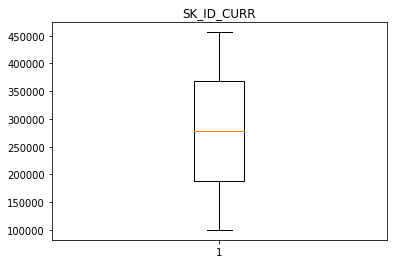

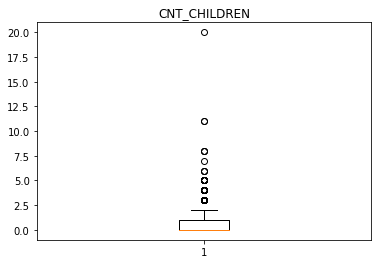

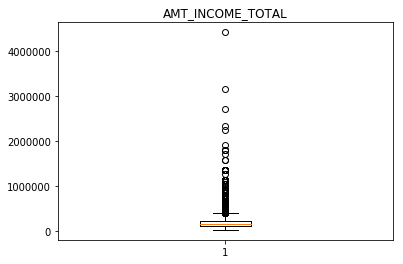

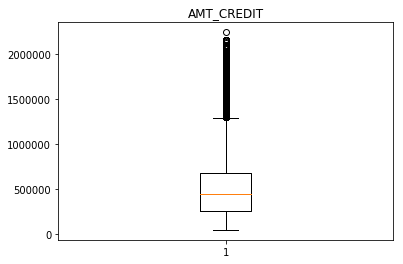

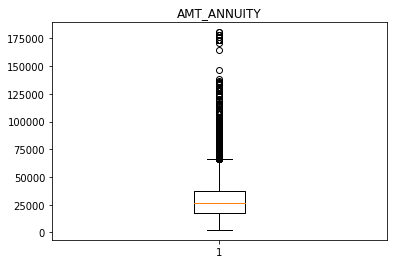

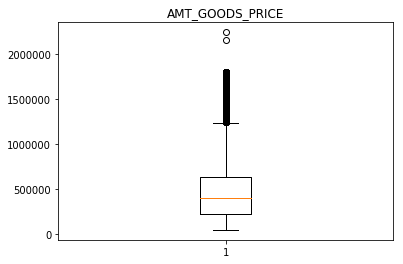

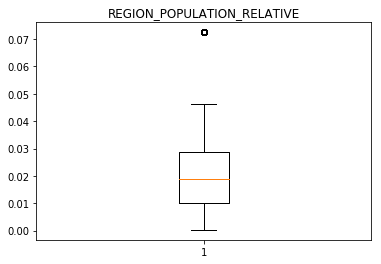

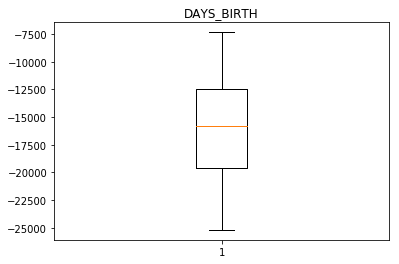

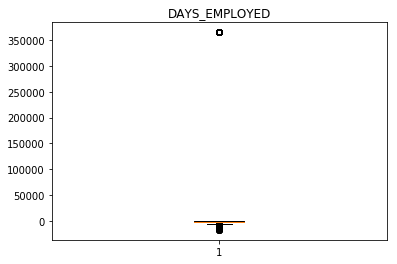

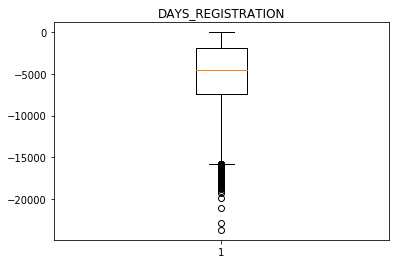

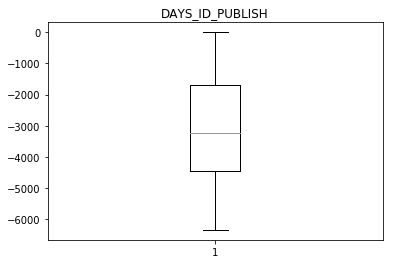

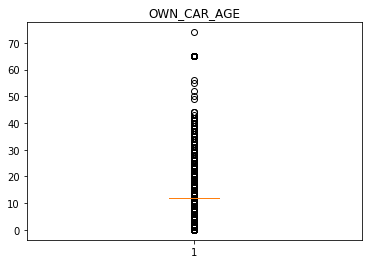

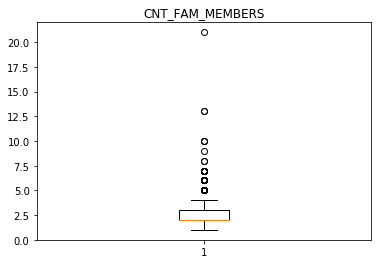

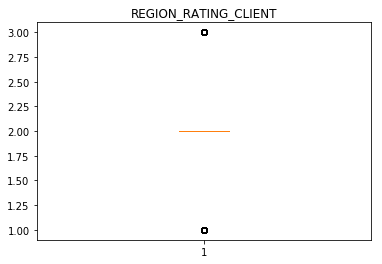

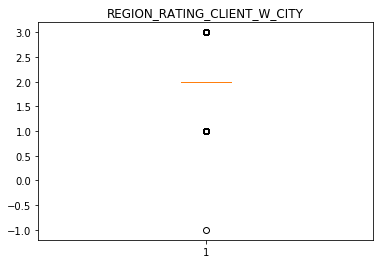

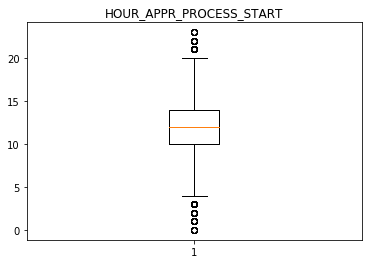

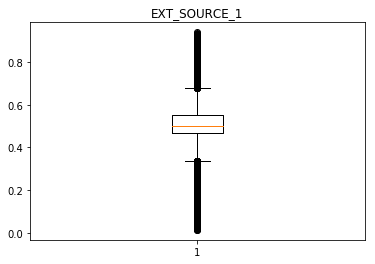

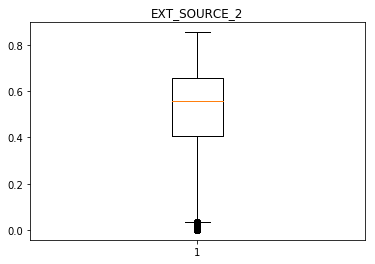

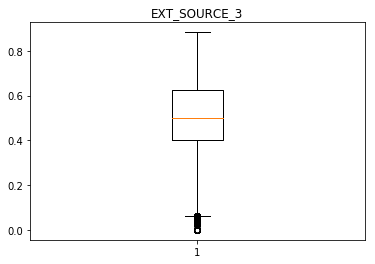

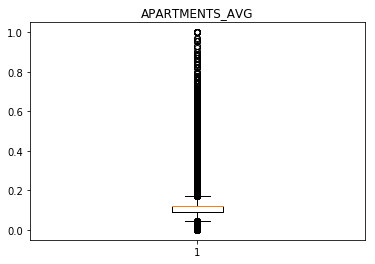

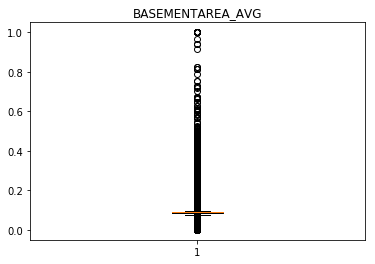

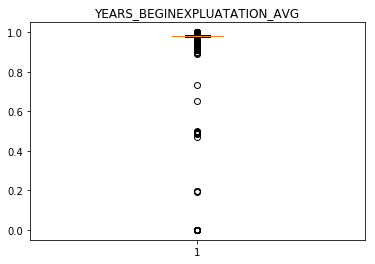

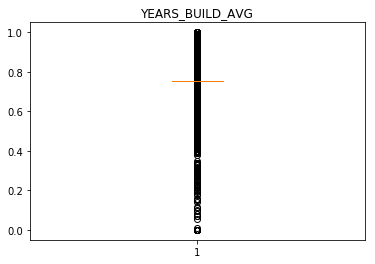

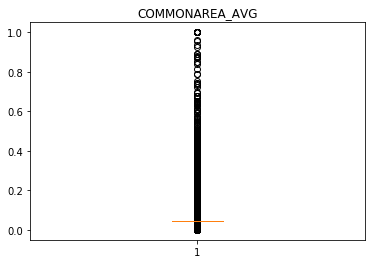

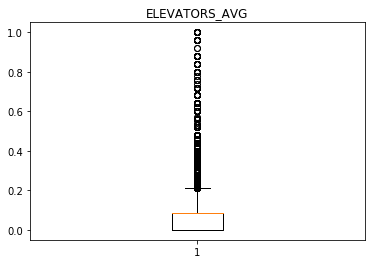

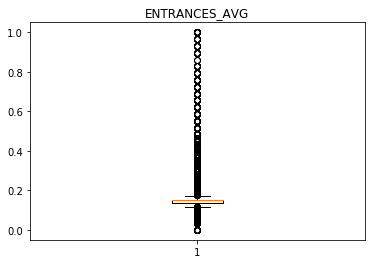

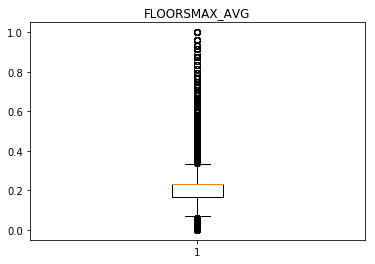

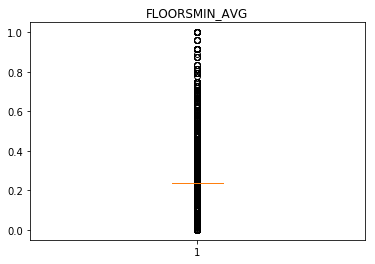

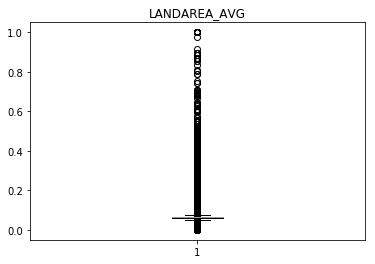

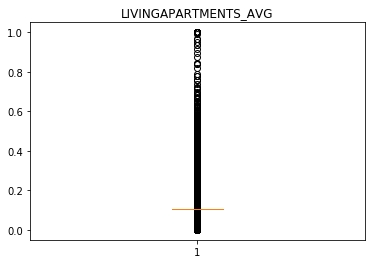

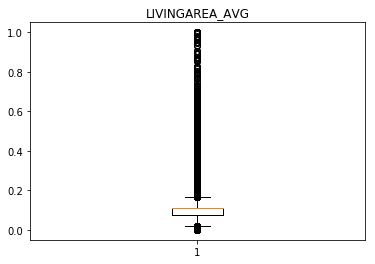

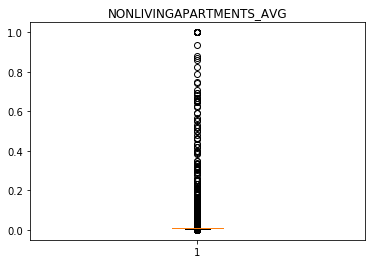

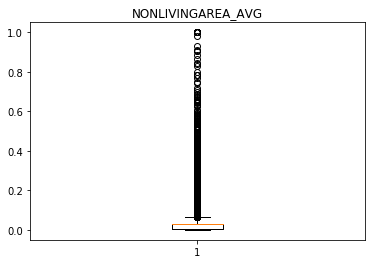

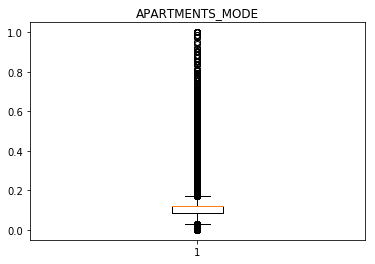

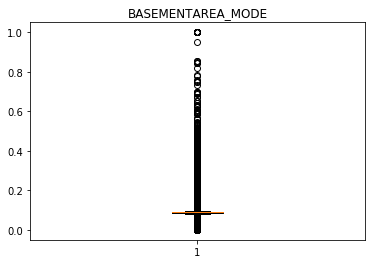

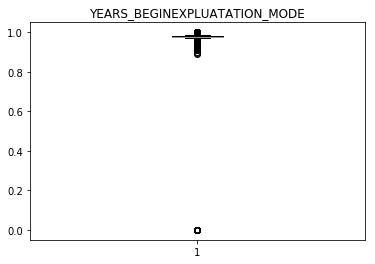

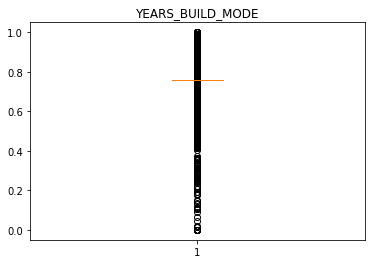

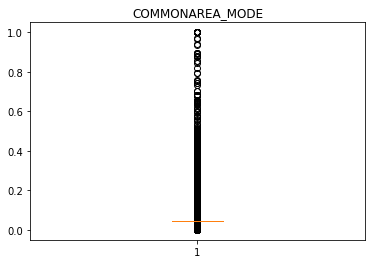

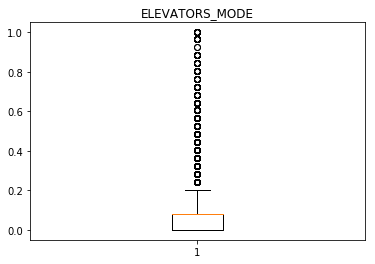

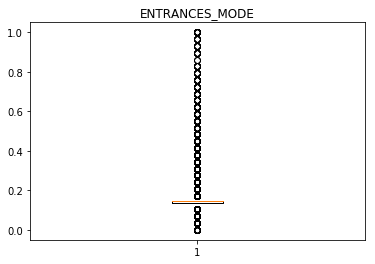

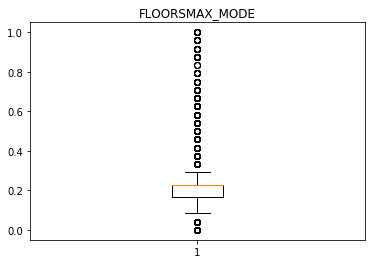

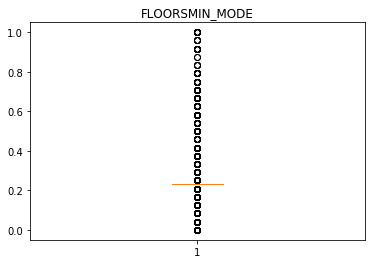

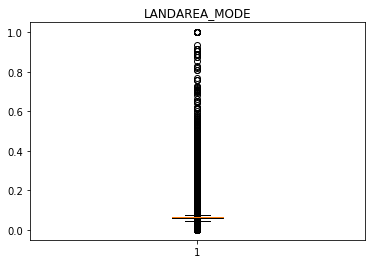

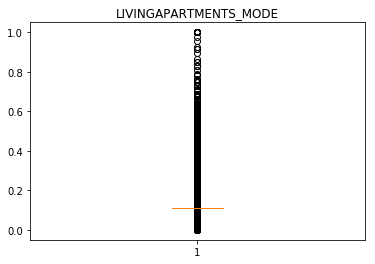

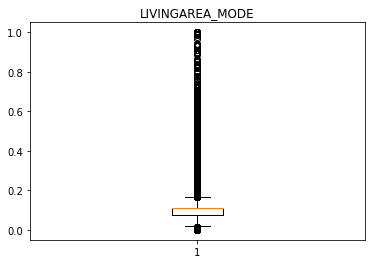

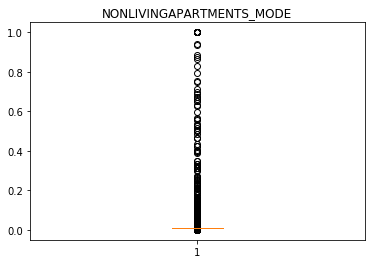

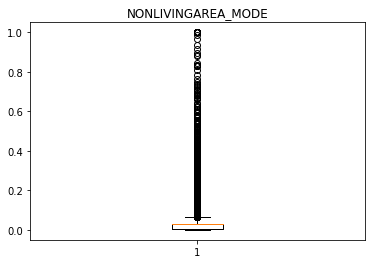

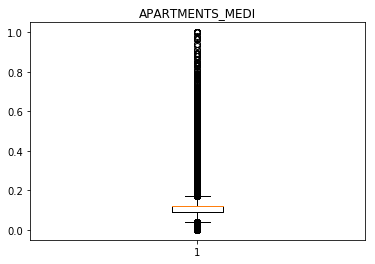

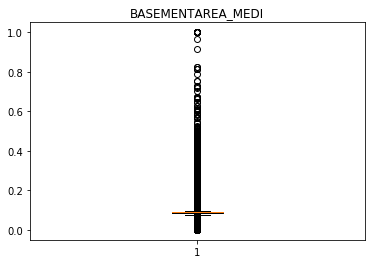

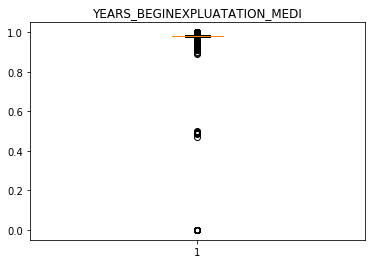

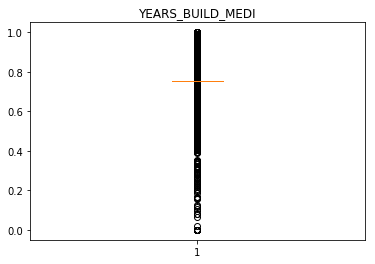

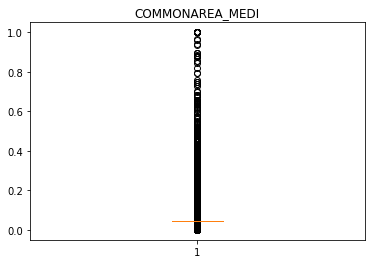

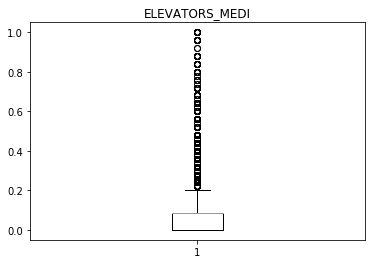

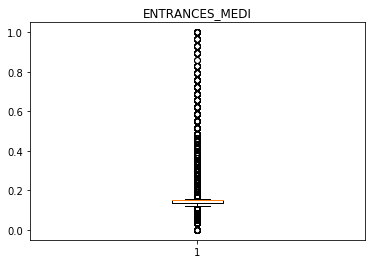

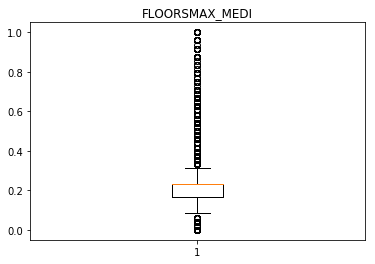

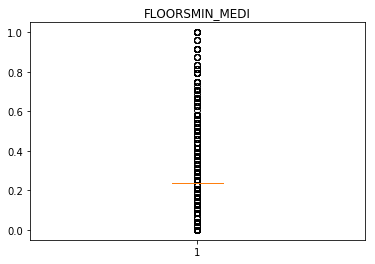

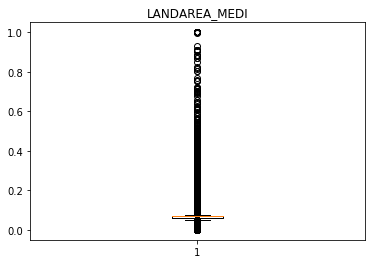

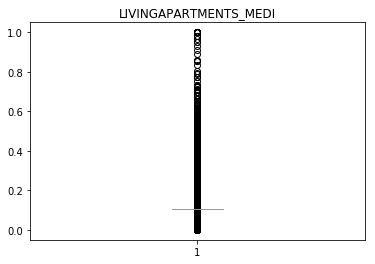

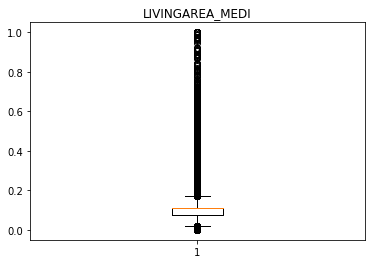

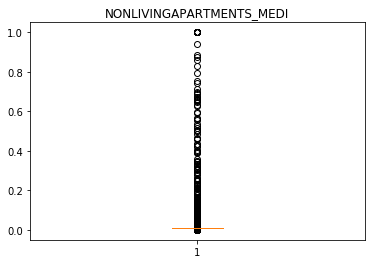

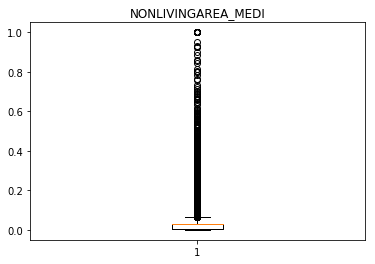

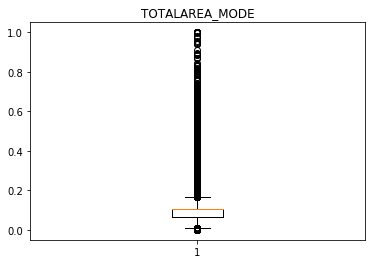

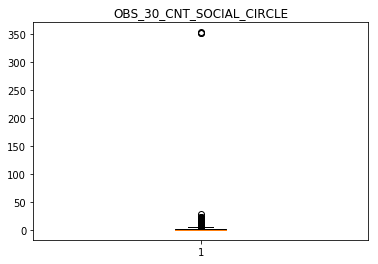

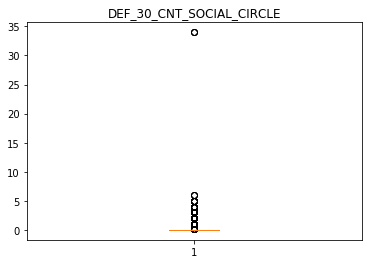

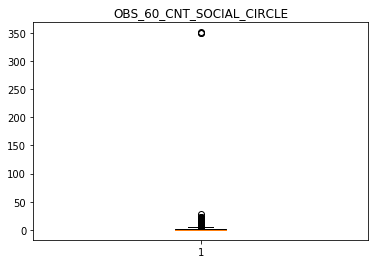

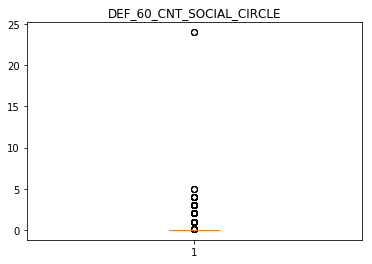

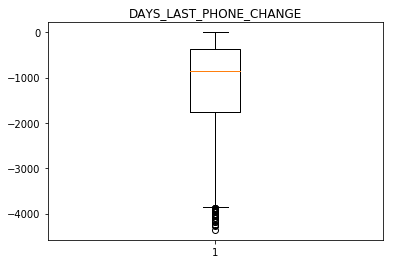

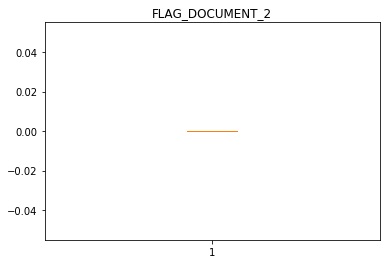

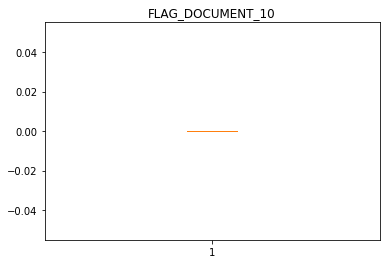

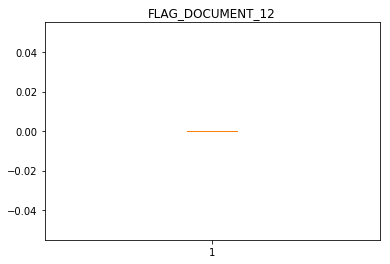

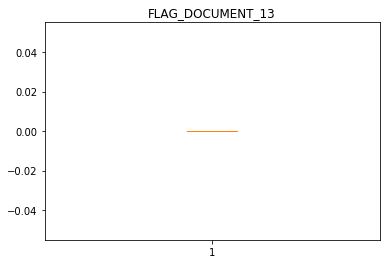

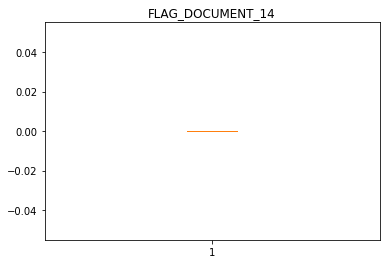

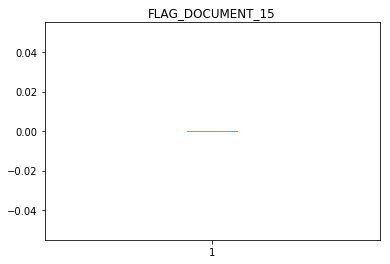

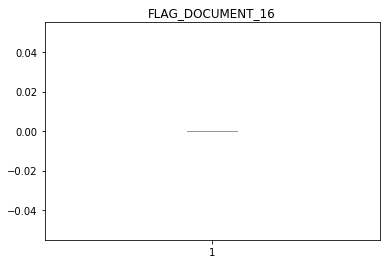

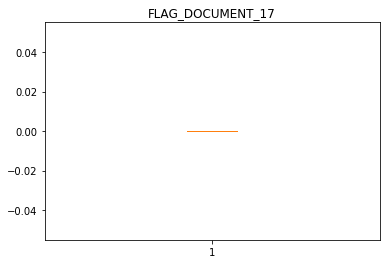

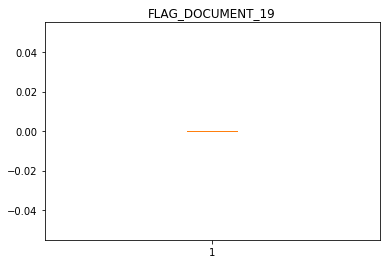

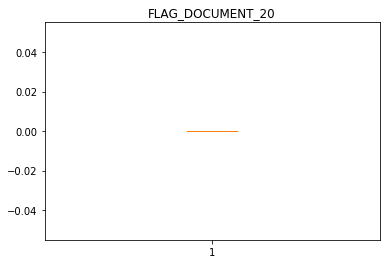

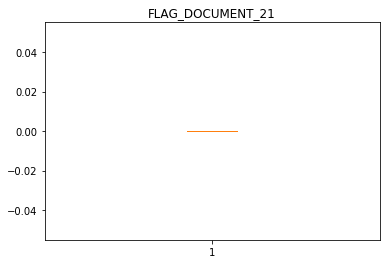

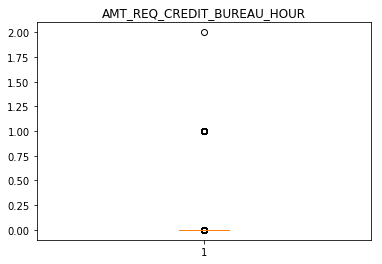

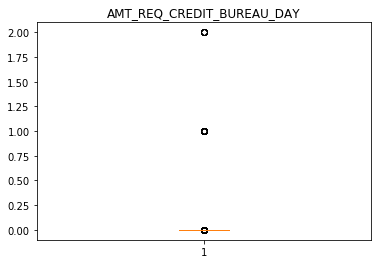

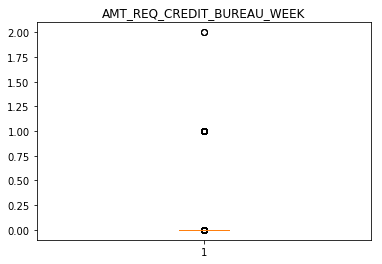

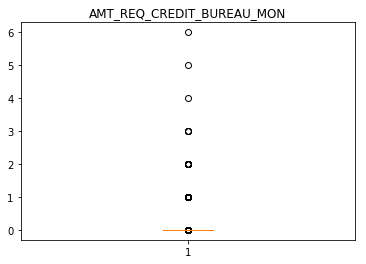

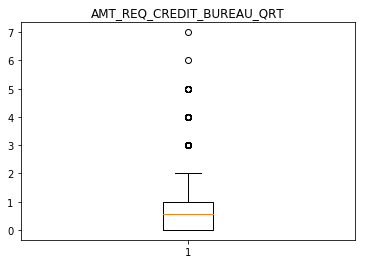

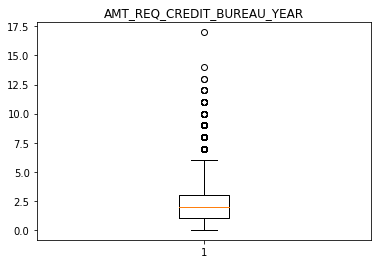

In [9]:
# 先篩選數值型的欄位
"""
YOUR CODE HERE, fill correct data types (for example str, float, int, ...)
"""
dtype_select = [np.dtype('int32'),np.dtype('int64'),np.dtype('float32'),np.dtype('float64')]

numeric_columns = list(app_train.columns[list(app_train.dtypes.isin(dtype_select))])

# 再把只有 2 值 (通常是 0,1) 的欄位去掉
numeric_columns = list(app_train[numeric_columns].columns[list(app_train[numeric_columns].apply(lambda x:len(x.unique())!=2 ))])
print("Numbers of remain columns", len(numeric_columns))

# 檢視這些欄位的數值範圍
for col in numeric_columns:
    """
    Your CODE HERE, make the box plot
    """
    app_train[col] = app_train[col].fillna(app_train[col].mean()) 
    plt.title(col)
    
    plt.boxplot(app_train[col])
 
    plt.show()


# 從上面的圖檢查的結果，至少這三個欄位好像有點可疑




# 資料完整度問題
初次輸出盒鬚圖有一半以上COLUMN是沒有顯示圖形的，檢視完整資料發現接有資料遺失的問題<br />
先將遺失值補上平均數值，使圖形可以顯示<br />

# 極端值問題
* DAYS_EMPLOYED 
* AMT_INCOME_TOTAL
> 有極端值，可能屬於輸入格式轉換上或輸入錯誤<br />

* CNT_CHILDREN 
> 資料有可能是特例，也有可能因資料蒐集端或資料填寫人對於資料定義不同而誤填寫<br />

* OBS_30_CNT_SOCIAL_CIRCLE
* DEF_30_CNT_SOCIAL_CIRCLE
* OBS_60_CNT_SOCIAL_CIRCLE
* DEF_60_CNT_SOCIAL_CIRCLE
> 偏離中位數太多，可能原因為資料輸入錯誤或者為單一案例











### Hints: Emprical Cumulative Density Plot, [ECDF](https://zh.wikipedia.org/wiki/%E7%BB%8F%E9%AA%8C%E5%88%86%E5%B8%83%E5%87%BD%E6%95%B0), [ECDF with Python](https://stackoverflow.com/questions/14006520/ecdf-in-python-without-step-function)

count    4.874400e+04
mean     1.784318e+05
std      1.015226e+05
min      2.694150e+04
25%      1.125000e+05
50%      1.575000e+05
75%      2.250000e+05
max      4.410000e+06
Name: AMT_INCOME_TOTAL, dtype: float64


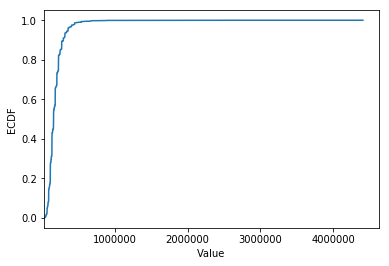

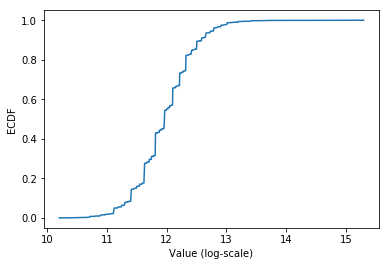

26941.5          1
27000.0          5
28350.0          6
28575.0          7
28800.0          8
29250.0         11
30150.0         12
30600.0         13
31500.0         31
31990.5         32
32400.0         33
32850.0         34
33300.0         35
33750.0         41
33768.0         42
34290.0         43
34650.0         44
35100.0         45
36000.0         83
36202.5         84
36400.5         85
36810.0         86
36900.0         87
37800.0         88
38250.0         90
38700.0         92
38754.0         93
39465.0         94
39600.0         95
40347.0         96
             ...  
661500.0     48519
666000.0     48520
675000.0     48626
711000.0     48627
720000.0     48638
742500.0     48639
765000.0     48646
787500.0     48647
810000.0     48661
855000.0     48665
877500.0     48667
900000.0     48702
927000.0     48703
945000.0     48704
976500.0     48705
990000.0     48706
1035000.0    48708
1080000.0    48709
1125000.0    48721
1260000.0    48722
1350000.0    48732
1575000.0   

In [15]:
# 最大值離平均與中位數很遠
print(app_train['AMT_INCOME_TOTAL'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
YOUR CODE HERE
"""
cdf = app_train['AMT_INCOME_TOTAL'].value_counts().sort_index().cumsum()

plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([cdf.index.min(), cdf.index.max() * 1.05]) # 限制顯示圖片的範圍
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()

# 改變 y 軸的 Scale, 讓我們可以正常檢視 ECDF
plt.plot(np.log(list(cdf.index)), cdf/cdf.max())
plt.xlabel('Value (log-scale)')
plt.ylabel('ECDF')

plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()

## 補充：Normal dist 的 ECDF
![ecdf_normal](https://au.mathworks.com/help/examples/stats/win64/PlotEmpiricalCdfAndCompareWithSamplingDistributionExample_01.png)

In [16]:
np.log(list(cdf.index))

array([10.20142313, 10.20359214, 10.25238231, 10.26028749, 10.26813067,
       10.28363485, 10.3139402 , 10.32875529, 10.35774282, 10.37319426,
       10.3859137 , 10.39970702, 10.41331268, 10.4267357 , 10.42726889,
       10.44260905, 10.453053  , 10.46595641, 10.49127422, 10.49688346,
       10.50233779, 10.51352483, 10.51596683, 10.54006438, 10.55189884,
       10.56359488, 10.56498926, 10.58316948, 10.5865844 , 10.60527232,
       10.60905725, 10.61790687, 10.62010709, 10.62624208, 10.63103616,
       10.64184708, 10.66312447, 10.69421506, 10.70436743, 10.71441777,
       10.73048795, 10.7342204 , 10.74397657, 10.75363848, 10.76320793,
       10.77400656, 10.78207642, 10.79137881, 10.80972795, 10.82219536,
       10.82774645, 10.83512984, 10.8366354 , 10.84544603, 10.85417971,
       10.86283777, 10.87142152, 10.88272491, 10.89673933, 10.9040459 ,
       10.90503813, 10.91326863, 10.92126932, 10.92143194, 10.93049642,
       10.93756132, 10.94219059, 10.94552949, 10.95343467, 10.96

count    48744.000000
mean         0.021226
std          0.014428
min          0.000253
25%          0.010006
50%          0.018850
75%          0.028663
max          0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


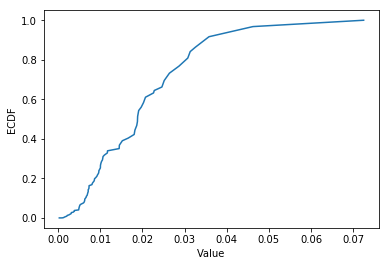

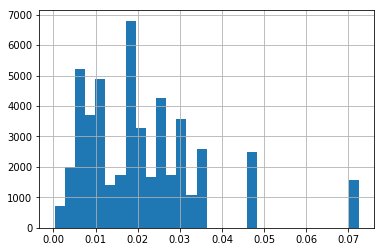

0.035792    2582
0.046220    2497
0.030755    1991
0.026392    1805
0.028663    1740
0.025164    1599
0.031329    1595
0.072508    1565
0.019101    1466
0.020713    1327
0.018850    1288
0.020246    1146
0.018634    1116
0.032561    1088
0.015221    1085
0.018209    1083
0.022625    1060
0.018801     951
0.018029     897
0.024610     860
0.014520     846
0.019689     805
0.010032     676
0.010006     674
0.007020     659
0.016612     652
0.022800     601
0.004960     583
0.014464     552
0.011703     523
            ... 
0.008230     275
0.007114     269
0.006305     269
0.008575     269
0.008019     268
0.005084     267
0.007274     262
0.002042     256
0.003122     252
0.008068     249
0.006671     241
0.003813     235
0.008866     228
0.006852     206
0.006296     205
0.003818     180
0.005313     180
0.006233     178
0.002134     173
0.005144     169
0.005002     156
0.004849     155
0.002506     119
0.003541      92
0.001417      79
0.001276      69
0.001333      28
0.000938      

In [17]:
# 最大值落在分布之外
print(app_train['REGION_POPULATION_RELATIVE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
Your Code Here
"""
cdf = app_train['REGION_POPULATION_RELATIVE'].value_counts().sort_index().cumsum()


plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

app_train['REGION_POPULATION_RELATIVE'].hist(bins =30)
plt.show()

app_train['REGION_POPULATION_RELATIVE'].value_counts()

# 就以這個欄位來說，雖然有資料掉在分布以外，也不算異常，僅代表這間公司在稍微熱鬧的地區有的據點較少，
# 導致 region population relative 在少的部分較為密集，但在大的部分較為疏漏

count    48744.000000
mean         1.435738
std          3.579059
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        351.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


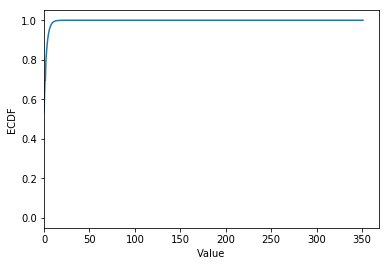

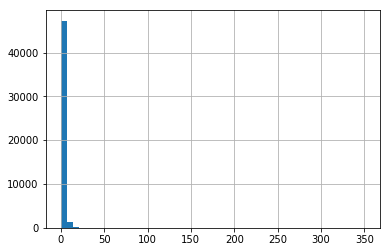

351.000000        1
349.000000        2
29.000000         1
23.000000         3
22.000000         1
21.000000         2
20.000000         8
19.000000         6
18.000000        12
17.000000        16
16.000000        17
15.000000        32
14.000000        45
13.000000        67
12.000000       106
11.000000       131
10.000000       216
9.000000        334
8.000000        490
7.000000        677
6.000000       1030
5.000000       1441
4.000000       2199
3.000000       3262
2.000000       4735
1.435738         29
1.000000       7741
0.000000      26140
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64


In [18]:
# 最大值落在分布之外
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
Your Code Here
"""
cdf = app_train['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts().sort_index().cumsum()


plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([cdf.index.min() * 0.95, cdf.index.max() * 1.05])
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

app_train['OBS_60_CNT_SOCIAL_CIRCLE'].hist(bins = 50)
plt.show()
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts().sort_index(ascending = False))


## 注意：當 histogram 畫出上面這種圖 (只出現一條，但是 x 軸延伸很長導致右邊有一大片空白時，代表右邊有值但是數量稀少。這時可以考慮用 value_counts 去找到這些數值

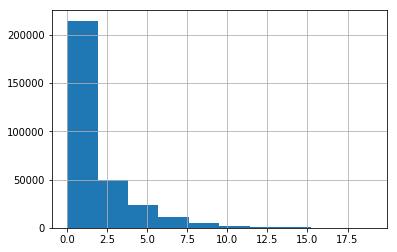

In [7]:
# 把一些極端值暫時去掉，在繪製一次 Histogram
# 選擇 OBS_60_CNT_SOCIAL_CIRCLE 小於 20 的資料點繪製
"""
Your Code Here
"""
loc_a = app_train[app_train['OBS_60_CNT_SOCIAL_CIRCLE']<20].index
loc_b = 'OBS_60_CNT_SOCIAL_CIRCLE'

app_train.loc[loc_a, loc_b].hist()
plt.show()